In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
import math
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.metrics import confusion_matrix

In [2]:
# Read in csv
auto_df = pd.read_csv('cleanDataAuto.csv')

#Display Dataframe
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


In [3]:
# Display missing numerical data
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
dtype: int64

In [4]:
# N cases (N, )
auto_df.shape

(392, 6)

# 1. Mean and Standard Deviation

In [5]:
# Mean and Standard Deviation for response and explanatory variables
auto_df.agg(['mean', 'std'])

,mpg,cylinders,displacement,horsepower,weight,acceleration
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864


# 2. Display Histogram

In [6]:
# Aesthetics
sns.set_style("whitegrid")

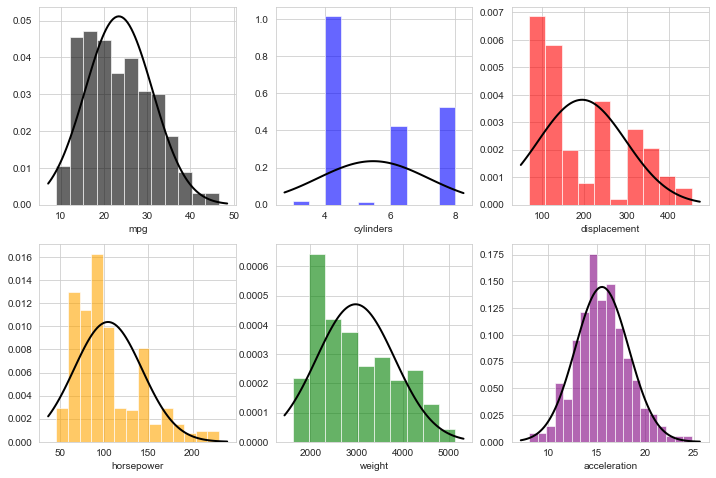

In [7]:
# Add a color list
color_list = ['black', 'blue', 'red', 'orange', 'green', 'purple']

#historgram + normal dist overlayed
fig, axs = plt.subplots(2, 3, figsize = (12,8))
for i, column in enumerate(auto_df.columns):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(auto_df[column])
    # Plot the histogram.
    axs[i//3,i%3].hist(auto_df[column], bins="auto", density=True, alpha=0.6, color=color_list[i])
    # Plot the PDF.
    xmin, xmax = axs[i//3,i%3].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    axs[i//3,i%3].plot(x, p, 'k', linewidth=2)
    #title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    #axs[i//3,i%3].set_title(title, fontsize = 5)
    axs[i//3,i%3].set_xlabel(column)
    #axs[i//3,i%3].set_ylabel('Frequency')

# 3. Display Scatterplots

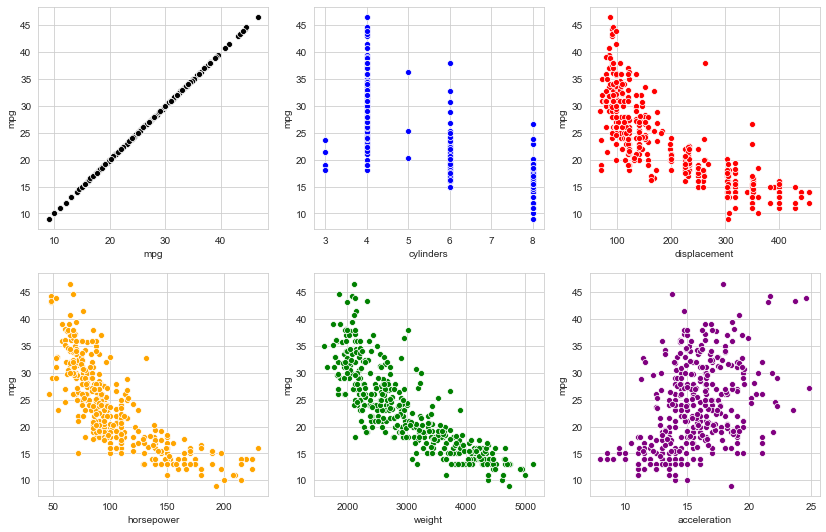

In [8]:
# Grab Features
features = auto_df.columns

# Scatter plots for each feature plotted against MPG
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (14,9))
for i, column in enumerate(auto_df.columns):
    sns.scatterplot(x = auto_df[features[i]], y = auto_df[features[0]], ax=axes[i//3,i%3], color =  color_list[i])

# 5. Compute the correlations

In [9]:
# Correlation MPG with other 5 features
auto_df.corr()[0:1]

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.0,-0.777618,-0.805127,-0.778427,-0.832244,0.423329


# 6. Correlation Matrix

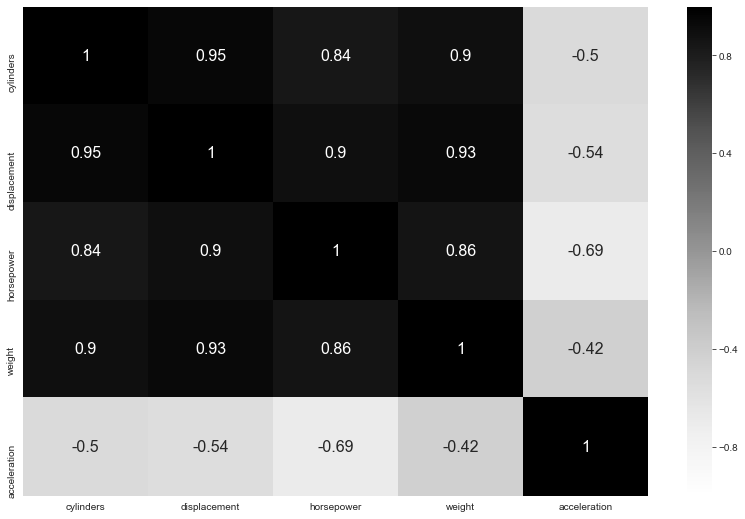

In [10]:
fig = plt.subplots(figsize = (14,9))

# Correlation Matrix as a heatmap for visual
sns.heatmap(auto_df[features[1:]].corr(), cmap = 'Greys', annot=True, annot_kws={"size": 16}, vmin = -1, vmax = 1, center = 0)

# 7. Compute Quantile

In [11]:
# get quantiles list from 0-100
x_quantiles = np.arange(0, 1.01,.01)

# MPG quantiles
y_quant_value = []
for i in x_quantiles:
    y_quant_value.append(auto_df.mpg.quantile(i))

# Create DataFrame for x: quantiles and y: MPG
quant_curve = pd.DataFrame({'quantile': x_quantiles, 'mpg': y_quant_value})

Text(0, 0.5, 'mpg')

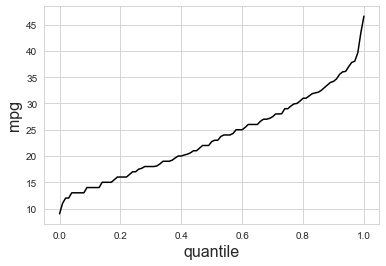

In [12]:
# Plot x quantiles and increasing quantile curve
quant_plot = sns.lineplot(x=quant_curve['quantile'], y=quant_curve.mpg, color = 'black')
quant_plot.set_xlabel(xlabel = 'quantile', fontsize = 16)
quant_plot.set_ylabel(ylabel = 'mpg', fontsize = 16)

((array([-2.91707214, -2.62850148, -2.46572851, -2.35005202, -2.25924608,
         -2.18395743, -2.11932901, -2.06250202, -2.01164606, -1.96551592,
         -1.9232246 , -1.88411705, -1.84769527, -1.81357142, -1.78143737,
         -1.75104405, -1.72218717, -1.69469702, -1.66843096, -1.64326798,
         -1.61910443, -1.59585088, -1.57342957, -1.55177245, -1.53081964,
         -1.51051812, -1.49082075, -1.47168538, -1.4530742 , -1.43495315,
         -1.41729142, -1.40006105, -1.3832366 , -1.36679482, -1.35071445,
         -1.33497596, -1.31956136, -1.30445409, -1.2896388 , -1.27510129,
         -1.26082838, -1.24680779, -1.23302811, -1.21947866, -1.20614946,
         -1.19303118, -1.18011506, -1.16739287, -1.15485687, -1.14249978,
         -1.13031472, -1.11829522, -1.10643514, -1.09472868, -1.08317036,
         -1.07175496, -1.06047754, -1.04933341, -1.03831809, -1.02742733,
         -1.0166571 , -1.00600352, -0.99546292, -0.98503177, -0.97470672,
         -0.96448454, -0.95436217, -0.

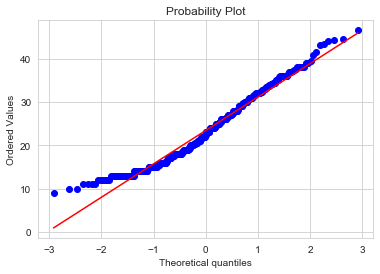

In [13]:
# plot theoretical quantiles for MPG
stats.probplot(auto_df.iloc[:,0],plot=pylab)


# 8. Low MPG and High MPG

In [14]:
# Store quantile number into variable
low_quant = auto_df.mpg.quantile(0.33)
high_quant = auto_df.mpg.quantile(0.66)

# Create two separate tables for Low MPG and High MPG categories
low_mpg_df = auto_df[auto_df['mpg'] <= low_quant]
high_mpg_df = auto_df[auto_df['mpg'] > high_quant]

# 9. Histograms of Low MPG and High MPG

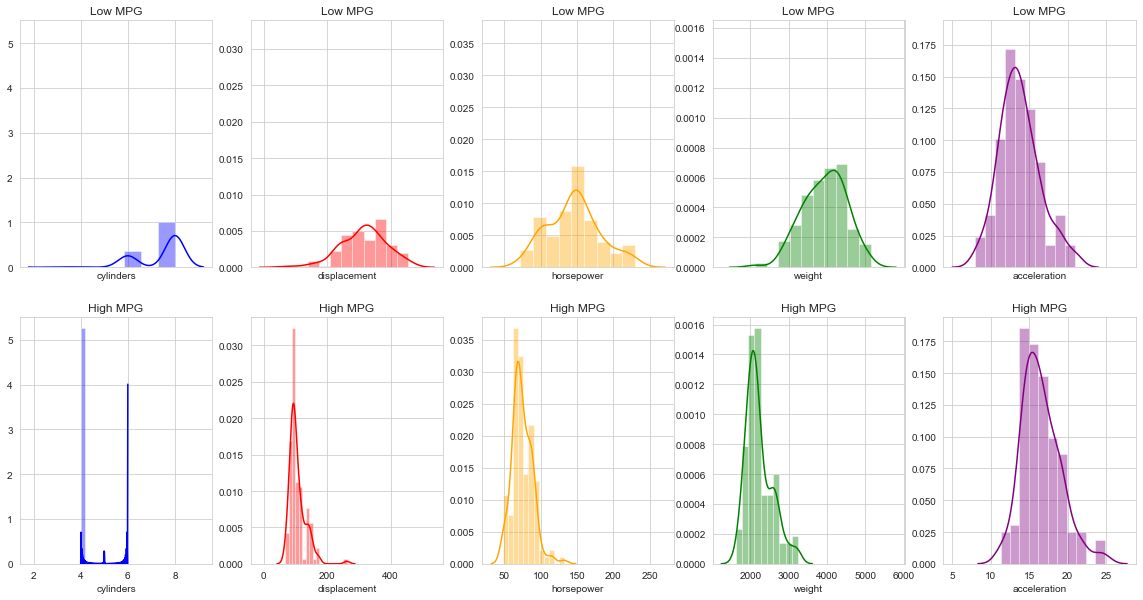

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize = (20,10), sharex='col', sharey ='col')
for i, column in enumerate(low_mpg_df.columns[1:]):
    sns.distplot(low_mpg_df[column], ax=axes[0,i], color =  color_list[i+1]).set_title('Low MPG')
    sns.distplot(high_mpg_df[column], ax = axes[1,i], color = color_list[i+1]).set_title('High MPG')

# 10. Interpret

Displacement is a feature that could be used to discriminate low mpg and high mpg

# 11. Mean and Std Low MPG and High MPG

In [16]:
# Get mean and std for Low MPG table
low_mpg_df.agg(['mean', 'std']).drop(['mpg'], axis = 1)

,cylinders,displacement,horsepower,weight,acceleration
mean,7.407692,315.307692,145.623077,3937.330769,13.778462
std,1.009230,71.114042,35.841007,557.185694,2.649294


In [17]:
# Get mean and std for High MPG table
high_mpg_df.agg(['mean', 'std']).drop(['mpg'], axis = 1)

,cylinders,displacement,horsepower,weight,acceleration
mean,4.083333,106.401515,74.393939,2226.090909,16.560606
std,0.391546,26.422249,13.884341,345.877851,2.519989


# 12.

In [18]:
# Get average number of cases between Low MPG table and High MPG table
m = (len(low_mpg_df) + len(high_mpg_df))/2

In [19]:
# Create a DataFrame to store mean and std of the two tables
df = pd.DataFrame({'mL': low_mpg_df.agg('mean')[1:],
                   'mH': high_mpg_df.agg('mean')[1:],
                   'stdL': low_mpg_df.agg('std')[1:],
                   'stdH': high_mpg_df.agg('std')[1:]})

# Calculating pooled standard deviation for each feature
df['s(F)'] = np.sqrt((df.stdL**2 + df.stdH**2) / m)

# Calculating discrimating power for each feature
df['disc(F)'] = abs((df['mH'] -df['mL'])) / df['s(F)']

In [20]:
# Display pooled standard deviation and discriminating power
df[['s(F)', 'disc(F)']]

,s(F),disc(F)
cylinders,0.094580,35.148517
displacement,6.628266,31.517470
horsepower,3.358199,21.210516
weight,57.298428,29.865390
acceleration,0.319459,8.708918


# 13. Threshold

In [21]:
# Calculating Threshold for each feature
df['thr(F)'] = (df['mL'] * df['stdH'] + df['mH'] * df['stdL']) / (df['stdL']+df['stdH'])

# Displaying Discriminating Power and Threshold
df[['disc(F)', 'thr(F)']]

,disc(F),thr(F)
cylinders,35.148517,5.012560
displacement,31.517470,162.993488
horsepower,21.210516,94.282581
weight,29.865390,2881.504328
acceleration,8.708918,15.204330


In [22]:
# Create DataFrame using the threshold and the means of the high and low table to assign a score to F(n)
score_df = pd.DataFrame()
for feature in features[1:]:
    if df.loc[feature].mH > df.loc[feature].mL:
        score_df[feature] = np.where(auto_df[feature] > df['thr(F)'].loc[feature], 1, -1)
    elif df.loc[feature].mH < df.loc[feature].mL:
        score_df[feature] = np.where(auto_df[feature] < df['thr(F)'].loc[feature], 1, -1)

# 14. Automatic Classifier

In [23]:
# Sum the cases(rows) to give a full score and adding to score dataframe
score_df['fullSCORE(n)'] = score_df.sum(axis = 1)

In [24]:
# Create classifier
def classifier(a, fullscore_n):
    if fullscore_n >= a:
        return 'High MPG'
    elif fullscore_n <= a:
        return 'Low MPG'

In [25]:
# Create column labeling true class into original auto dataframe using median
conditions = [
    (auto_df['mpg'] > auto_df.mpg.quantile(0.50)),
    (auto_df['mpg'] <= auto_df.mpg.quantile(0.50))]
choices = ['High MPG', 'Low MPG']

auto_df['trueclass(n)'] = np.select(conditions, choices)

In [26]:
# Create Training Set
training_set = low_mpg_df.append(high_mpg_df)
training_set = training_set.sort_index()

training_set['fullscore(n)'] = score_df['fullSCORE(n)']

training_set['trueclass(n)'] = auto_df['trueclass(n)']

In [27]:
# Create Test Set
test_set = auto_df.loc[(auto_df["mpg"] > low_quant) & (auto_df['mpg'] <= high_quant),]

test_set['fullscore(n)'] = score_df['fullSCORE(n)']

C:\Users\Johnny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [28]:
classification = []
for i in training_set['fullscore(n)']:
    classification.append(classifier(2, i))
training_set['Pred_A'] = classification

In [29]:
classification = []
for i in test_set['fullscore(n)']:
    classification.append(classifier(2, i))
test_set['Pred_A'] = classification

C:\Users\Johnny\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [30]:
cmtx_a_train = pd.DataFrame(
    confusion_matrix(training_set['trueclass(n)'], training_set['Pred_A'], labels=['High MPG', 'Low MPG'], normalize = 'true'), 
    index=['true:High MPG', 'true:Low MPG'], 
    columns=['pred:High MPG', 'pred:Low MPG'])

In [31]:
cmtx_a_test = pd.DataFrame(
    confusion_matrix(test_set['trueclass(n)'], test_set['Pred_A'], labels=['High MPG', 'Low MPG'], normalize = 'true'), 
    index=['true:High MPG', 'true:Low MPG'], 
    columns=['pred:High MPG', 'pred:Low MPG'])

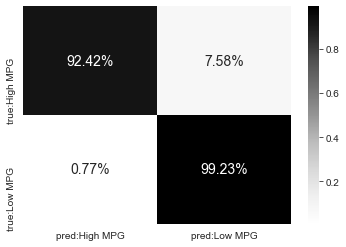

In [32]:
sns.heatmap(cmtx_a_train, annot=True, fmt = '.2%', annot_kws={"size": 14}, cmap = 'Greys')

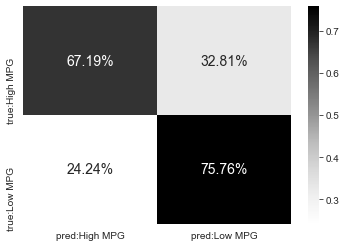

In [33]:
sns.heatmap(cmtx_a_test, annot=True, fmt = '.2%', annot_kws={"size": 14}, cmap = 'Greys')